# Predicting Car Prices

I'll practice the machine learning workflow learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

# Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
cols = ['symboling','normalized-losses','make','fuel-type','aspiration',
        'num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
         'length','width','height','curb-weight','engine-type','num-of-cylinders',
         'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg'
         ,'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data',names=cols)
cars.head(n=5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [3]:
# Target column to predict
target = 'price'

# Numeric columns
print(cars.info())
numeric_features = ['wheel-base','length','width','height','curb-weight','engine-size',
                    'compression-ratio','city-mpg','highway-mpg',
                    #Objects rather than int64 or float64
                    'bore','stroke','horsepower','peak-rpm','num-of-cylinders','normalized-losses']





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [4]:
cars = cars.replace(to_replace='?',value=np.nan)
cars.head(n=5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [6]:
float_cols = ['bore','stroke','horsepower','peak-rpm','price']
cars[float_cols] = cars[float_cols].astype('float64')
cars['normalized-losses'] = cars['normalized-losses'].astype('float64')
words_to_num = {
    'eight':8,
    'five':5,
    'four':4,
    'six':6,
    'three':3,
    'twelve':12, 
    'two':2
}
cars['num-of-cylinders'] = cars['num-of-cylinders'].apply(lambda x: words_to_num.get(x.strip()))
cars['num-of-cylinders'] = cars['num-of-cylinders'].astype('int64')

In [7]:
# Four missing Price rows which is our target, so dropping those rows

cars = cars.dropna(subset=['price'])

# For the below 4 columns fill the missing values with means
means = cars[['bore','stroke','horsepower','peak-rpm','normalized-losses']].mean()
cars = cars.fillna(means)

In [8]:
# For normalized-losses contains 36 null values and based on description it doesnt tell me what the column actually means.
# Dropping normalized-losses
#cleaned_cars = cars.drop(labels='normalized-losses',axis=1)
all_cols = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
            'compression-ratio','city-mpg','highway-mpg',
            'bore','stroke','horsepower','peak-rpm','num-of-cylinders','price']
cleaned_cars = cars[all_cols]
print(cleaned_cars.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 16 columns):
normalized-losses    201 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-size          201 non-null int64
compression-ratio    201 non-null float64
city-mpg             201 non-null int64
highway-mpg          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
num-of-cylinders     201 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(5)
memory usage: 26.7 KB
None


In [9]:
#Normalize the numeric columns except price
price = cleaned_cars['price'].copy()
normalized_cars = (cleaned_cars  - cleaned_cars.mean())/cleaned_cars.std()
normalized_cars['price'] = price


In [10]:
normalized_cars.head(n=5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,bore,stroke,horsepower,peak-rpm,num-of-cylinders,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,-0.290709,-0.650624,-0.540937,0.519597,-1.825369,0.203476,-0.245942,-0.342804,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,-0.290709,-0.650624,-0.540937,0.519597,-1.825369,0.203476,-0.245942,-0.342804,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-0.290709,-0.961995,-0.687669,-2.427374,0.674254,1.354267,-0.245942,1.544965,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.041019,-0.183569,-0.100741,-0.524899,0.452769,-0.037387,0.799836,-0.342804,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.540399,-1.117680,-1.274597,-0.524899,0.452769,0.310527,0.799836,0.601081,17450.0


# Univariate Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features,target,df,k=5):
    # Randomize dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.loc[shuffled_index]
    
    #KNN Model default params
    model = KNeighborsRegressor(n_neighbors=k)
    
    # Divide number of rows in half and round.
    last_train_row = int(len(df) / 2)
    
    train = df[:last_train_row]
    test = df[last_train_row:]
    
    #fit the model
    model.fit(train[features],train[target])
    
    #Predict the model
    predictions = model.predict(test[features])
    
    #RMSE calculation
    rmse = sqrt(mean_squared_error(test[target],predictions))
    return rmse

In [12]:
features = set(normalized_cars.columns)
features.remove('price')
features = list(features)
target ='price'
rmses = {}
for col in features:
    rmses[col] = knn_train_test([col],target,normalized_cars.copy())

#Convert dictionary to a series for easy sort
univariate_rmse = pd.Series(rmses)


In [13]:
print(univariate_rmse.sort_values(ascending=True))

engine-size          3297.699744
horsepower           4047.376555
curb-weight          4453.680703
highway-mpg          4625.047587
city-mpg             4754.637378
width                4772.510209
num-of-cylinders     5417.206767
length               5429.644740
wheel-base           5461.490336
compression-ratio    6606.571346
bore                 6793.057484
normalized-losses    7337.284820
peak-rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64


In [14]:
# Now run the same model only varying k
rmse_k = {}
for col in features:
    rmse_k[col] = {}
    for i in [1,3,5,7,9]:
        rmse_k[col][i] = knn_train_test([col],
                            target,normalized_cars.copy(),
                            k=i)

from pprint import pprint
pprint(rmse_k)


{'bore': {1: 8602.58848450066,
          3: 6977.123411794459,
          5: 6793.0574839170895,
          7: 6828.8678082042015,
          9: 6865.299025218018},
 'city-mpg': {1: 5901.143574354764,
              3: 4608.180446380397,
              5: 4754.637378183515,
              7: 5035.456896910003,
              9: 5333.1616578530175},
 'compression-ratio': {1: 8083.070177540802,
                       3: 7379.623321663306,
                       5: 6606.571345933599,
                       7: 6732.032905446027,
                       9: 7019.9512505224375},
 'curb-weight': {1: 5288.0195725810245,
                 3: 5011.8789151002,
                 5: 4453.680702653493,
                 7: 4330.149364501495,
                 9: 4632.92525121302},
 'engine-size': {1: 3227.659787364569,
                 3: 2946.7417879781224,
                 5: 3297.6997444813674,
                 7: 3563.43509928404,
                 9: 3831.764970642862},
 'height': {1: 8904.04645636071,
     

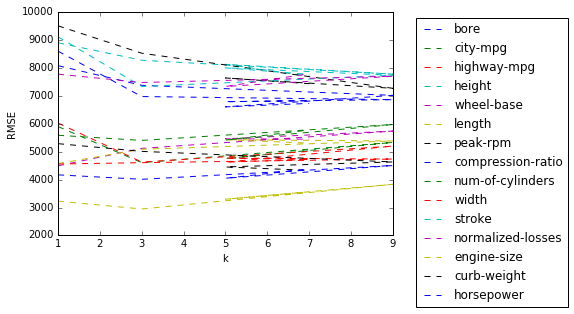

In [15]:
#Visualize
for k,v in rmse_k.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k,linestyle='dashed')
    plt.legend(bbox_to_anchor=(1.05, 1),loc='best')
    plt.xlabel('k')
    plt.ylabel('RMSE')

# Multivariate Model

In [17]:
multivariate_rmse = knn_train_test(features,target,normalized_cars.copy())

In [18]:
print(multivariate_rmse)

3621.4754007746405


In [26]:
#Pick the best 5 features
rmse_means = {}
for k,v in rmse_k.items():
    rmse_means[k] = np.mean(list(v.values()))

avg_rmse = pd.Series(rmse_means)
avg_rmse = avg_rmse.sort_values(ascending=True)
avg_rmse = list(avg_rmse.index[:5])
print(avg_rmse[:1])

['engine-size']


In [28]:
multivariate_rmse = {}
for i in range(1,5):
    feature_cols = avg_rmse[:i+1]
    multivariate_rmse[i+1] = knn_train_test(feature_cols,target,normalized_cars.copy())

pprint(multivariate_rmse)

{2: 2938.1306900277887,
 3: 3576.5381752208214,
 4: 3435.145837075945,
 5: 3457.4725012114936}


In [30]:
# Top 3 models are 2,4,5 which are the best features
multivariate_rmse_k = {}
for i in [2,4,5]:
    feature_cols = avg_rmse[:i]
    multivariate_rmse_k[i] = {}
    for j in range(1,26):
        multivariate_rmse_k[i][j] = knn_train_test(feature_cols,target,normalized_cars.copy(),k=j)

pprint(multivariate_rmse_k)

{2: {1: 2824.8287076781794,
     2: 2615.442453055988,
     3: 2676.6521480521455,
     4: 2831.7841198370656,
     5: 2938.1306900277887,
     6: 3128.516968715745,
     7: 3204.0554389097565,
     8: 3459.8826047221833,
     9: 3715.847780310613,
     10: 3980.307424292901,
     11: 4151.348212046468,
     12: 4231.233582321214,
     13: 4321.751665703992,
     14: 4366.489859575597,
     15: 4487.120412964203,
     16: 4591.609216968047,
     17: 4683.284404125849,
     18: 4739.084337496269,
     19: 4784.099214347852,
     20: 4777.706746763483,
     21: 4816.3918959481325,
     22: 4806.480777296786,
     23: 4832.819314595003,
     24: 4883.724636768665,
     25: 4975.5110313113555},
 4: {1: 2734.943456978825,
     2: 3094.990917547735,
     3: 3079.4233224582636,
     4: 3207.401445627884,
     5: 3435.145837075945,
     6: 3644.905717919087,
     7: 3639.209218512767,
     8: 3801.0236825048687,
     9: 3839.0853087451715,
     10: 3966.8524862569284,
     11: 4081.49368531884

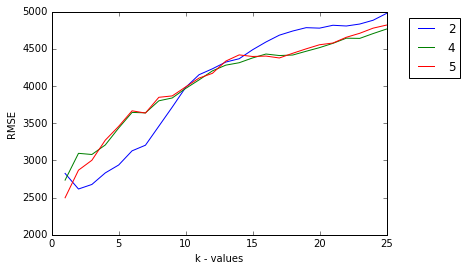

In [32]:
for k,v in multivariate_rmse_k.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.legend(bbox_to_anchor=(1.05, 1),loc='best')
    plt.xlabel('k - values')
    plt.ylabel('RMSE')

- The k value that seems most optimal for best 2 features is 2. 
- The k value that seems most optimal for best 4 features is 1.
- The k value that seems most optimal for best 5 features is 1.
